In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
%matplotlib inline

In [44]:
data=pd.read_csv("mnist_train_small.csv")

In [45]:
val=data.values

In [46]:
data.head()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<bound method NDFrame.head of       Unnamed: 0  5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  ...    0.608  \
0              0  0  0    0    0    0    0    0    0    0  ...        0   
1              1  4  0    0    0    0    0    0    0    0  ...        0   
2              2  1  0    0    0    0    0    0    0    0  ...        0   
3              3  9  0    0    0    0    0    0    0    0  ...        0   
4              4  2  0    0    0    0    0    0    0    0  ...        0   
5              5  1  0    0    0    0    0    0    0    0  ...        0   
6              6  3  0    0    0    0    0    0    0    0  ...        0   
7              7  1  0    0    0    0    0    0    0    0  ...        0   
8              8  4  0    0    0    0    0    0    0    0  ...        0   
9              9  3  0    0    0    0    0    0    0    0  ...        0   
10            10  5  0    0    0    0    0    0    0    0  ...        0   
11            11  3  0    0    0    0    0    0    0    0  ...        

In [5]:
X=val[:,2:]
y=val[:,1]

In [6]:
img=X[0].reshape([28,28])



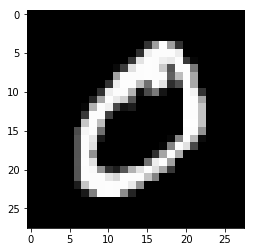

In [7]:
plt.imshow(img,cmap="gray")

In [8]:
from sklearn.cross_validation import train_test_split?

Object `train_test_split` not found.


In [ ]:
from sklearn.cross_validation import train_test_split

In [9]:
from sklearn.cross_validation import train_test_split

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
from sklearn.cross_validation import train_test_split

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [15]:
class KNN:
    
    def __init__(self,k):
        self.k=k
        self.X=None
        self.y=None
        
    
    @classmethod
    def distance(self,p1,p2):
        return np.sum((p1-p2)**2)
    
    def fit(self,X,y):
        self.X=X
        self.y=y
    
    
    def predict_point(self,point):
        distances=[]
        for X_test,y_test in zip(self.X,self.y):
            dis=KNN.distance(point,X_test)
            distances.append((dis,y_test))
        distances=sorted(distances)
        top=np.array(distances[:self.k])
        val,count=np.unique(top[:,1],return_counts=True)
        return val[np.argmax(count)]
    
    def predict(self,points):
        res=[]
        for point in points:
            res.append(self.predict_point(point))
        return np.array(res,dtype=int)
    
    def accuracy(self,X,y):
        return np.sum((self.predict(X)==y)/len(y))
    

In [16]:
model=KNN(10)
model.fit(X_train,y_train)
#model.predict(X_test)
#model.accuracy(X_test,y_test)

In [31]:
model.predict(X_test[:100])

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 0, 6, 5, 1, 4, 0, 9, 2, 1, 2, 8, 7, 1, 7,
       0, 7, 9, 1, 4, 9, 7, 9, 5, 7, 7, 3, 7, 0, 3, 6, 0, 3, 1, 6, 6, 6, 2,
       0, 5, 8, 1, 4, 7, 7, 8, 6, 1, 0, 5, 9, 3, 9, 4, 1, 3, 0, 3, 7, 7, 6,
       7, 9, 4, 8, 7, 5, 1, 3, 1, 8, 2, 0, 3, 7, 8, 1, 7, 9, 1, 3, 1, 0, 0,
       0, 1, 0, 4, 2, 1, 4, 3])

In [32]:
y_test[:100]

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 8, 6, 5, 1, 4, 0, 9, 2, 1, 2, 8, 7, 1, 7,
       0, 7, 9, 1, 4, 9, 7, 9, 5, 7, 7, 3, 7, 0, 3, 6, 0, 3, 1, 6, 6, 6, 2,
       0, 5, 8, 1, 4, 7, 7, 8, 6, 2, 0, 5, 9, 3, 9, 4, 1, 3, 0, 3, 7, 7, 6,
       7, 9, 9, 8, 9, 5, 4, 3, 5, 8, 2, 0, 3, 7, 8, 1, 7, 9, 1, 3, 1, 6, 0,
       0, 1, 0, 4, 2, 1, 4, 3], dtype=int64)

In [33]:
model.accuracy(X_test[:100],y_test[:100])

0.92999999999999994